### 1. Retrieve data

In [47]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/' + 'machine-learning-databases' +
                 '/breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [48]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [51]:
le = LabelEncoder()

In [52]:
y = le.fit_transform(y)

In [53]:
le.classes_

array(['B', 'M'], dtype=object)

In [54]:
le.transform(['M', 'B']) 

array([1, 0], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=0)

### 2. Combining transformers and estimators in pipeline

In [56]:
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.fit(X_test)

In [57]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [64]:
# use the make_pipeline as the wrapper in the function
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)

# data--> sc --> PCA --> LogisticRegression

C:\Users\ruire\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=1, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [62]:
y_pre = pipe_lr.predict(X_test)

In [63]:
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.930


### K-fold cross validation

In [65]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [67]:
kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

In [69]:
scores = []

<generator object _BaseKFold.split at 0x000002891DA280C0>

In [77]:
# from warnings import simplefilter
# ignore all future warnings
# simplefilter(action='ignore', category=FutureWarning)

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score)) 

In [80]:
 print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores))) 


CV accuracy: 0.968 +/- 0.028


In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [82]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           random_state=1))

In [83]:
train_sizes, train_scores, test_scores = learning_curve( estimator=pipe_lr,
                                                         X=X_train,
                                                         y=y_train,
                                                         train_sizes=np.linspace(
                                                          0.1, 1.0, 10),
                                                         cv=10,
                                                         n_jobs=1)

In [92]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

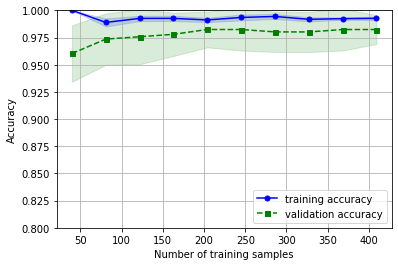

In [96]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid() 
plt.xlabel('Number of training samples') 
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0]) 
plt.show() 

### Addressing over- and underfitting with validation curves


In [97]:
from sklearn.model_selection import validation_curve 
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve( estimator=pipe_lr,
                                              X=X_train,
                                              y=y_train,
                                              param_name='logisticregression__C',
                                              param_range=param_range,
                                              cv=10)
                

In [98]:
train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1) 

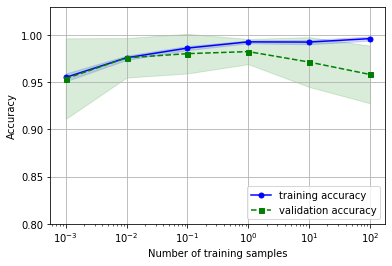

In [104]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid() 
# We plot the logarithmic figure
plt.xscale('log') 
plt.xlabel('Number of training samples') 
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03]) 
plt.show() 

### Grid search algorithm

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [127]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] 
param_grid = [{ 'svc__C': param_range,
                'svc__kernel': ['linear']},
               {'svc__C': param_range, 
                'svc__gamma': param_range,
                'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [129]:
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.978021978021978


C:\Users\ruire\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
print(gs.best_params_) 

{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [131]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=2)


In [135]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)

In [136]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores))) 

CV accuracy: 0.978 +/- 0.010


In [138]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(
                                                   random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring='accuracy',
                  cv=2)

In [139]:
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)

In [140]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 

CV accuracy: 0.934 +/- 0.012


## Confusion matrix

In [141]:
from sklearn.metrics import confusion_matrix


In [142]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [143]:
y_pred = pipe_svc.predict(X_test)

In [144]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [145]:
print(confmat)

[[69  3]
 [ 2 40]]


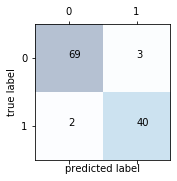

In [147]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [148]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [149]:
print('Precision: %.3f' % precision_score(  y_true=y_test, y_pred=y_pred)) 

Precision: 0.930


In [150]:
print('Precision: %.3f' % recall_score(  y_true=y_test, y_pred=y_pred)) 

Precision: 0.952


In [151]:
print('F1: %.3f' % f1_score( y_true=y_test, y_pred=y_pred)) 

F1: 0.941


In [152]:
from sklearn.metrics import make_scorer, f1_score 
scorer = make_scorer(f1_score, pos_label=0) 
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10) 

In [153]:
gs = gs.fit(X_train, y_train) 
print(gs.best_score_)

0.9826904032016462
